

#**Chennai House Price Prediction**


Import required files


In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import datetime as dt

Read file

In [58]:
csv = pd.read_csv("/content/train-chennai-sale.csv")
ch = pd.DataFrame(csv)
ch

,PRT_ID,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,...,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
0,P03210,Karapakkam,1004,04-05-2011,131,1.0,1.0,3,AbNormal,Yes,...,AllPub,Paved,A,4.0,3.9,4.9,4.330,380000,144400,7600000
1,P09411,Anna Nagar,1986,19-12-2006,26,2.0,1.0,5,AbNormal,No,...,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,760122,304049,21717770
2,P01812,Adyar,909,04-02-2012,70,1.0,1.0,3,AbNormal,Yes,...,ELO,Gravel,RL,4.1,3.8,2.2,3.090,421094,92114,13159200
3,P05346,Velachery,1855,13-03-2010,14,3.0,2.0,5,Family,No,...,NoSewr,Paved,I,4.7,3.9,3.6,4.010,356321,77042,9630290
4,P06210,Karapakkam,1226,05-10-2009,84,1.0,1.0,3,AbNormal,Yes,...,AllPub,Gravel,C,3.0,2.5,4.1,3.290,237000,74063,7406250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7104,P03834,Karapakkam,598,03-01-2011,51,1.0,1.0,2,AdjLand,No,...,ELO,No Access,RM,3.0,2.2,2.4,2.520,208767,107060,5353000
7105,P10000,Velachery,1897,08-04-2004,52,3.0,2.0,5,Family,Yes,...,NoSeWa,No Access,RH,3.6,4.5,3.3,3.920,346191,205551,10818480
7106,P09594,Velachery,1614,25-08-2006,152,2.0,1.0,4,Normal Sale,No,...,NoSeWa,Gravel,I,4.3,4.2,2.9,3.840,317354,167028,8351410
7107,P06508,Karapakkam,787,03-08-2009,40,1.0,1.0,2,Partial,Yes,...,ELO,Paved,RL,4.6,3.8,4.1,4.160,425350,119098,8507000


In [59]:
ch.describe()

,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
count,7109.000000,7109.000000,7108.000000,7104.000000,7109.000000,7109.000000,7109.000000,7109.000000,7061.000000,7109.000000,7109.000000,7.109000e+03
mean,1382.073006,99.603179,1.637029,1.213260,3.688704,3.517471,3.507244,3.485300,3.503254,376938.330708,141005.726544,1.089491e+07
std,457.410902,57.403110,0.802902,0.409639,1.019099,0.891972,0.897834,0.887266,0.527223,143070.662010,78768.093718,3.768603e+06
min,500.000000,0.000000,1.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,71177.000000,5055.000000,2.156875e+06
25%,993.000000,50.000000,1.000000,1.000000,3.000000,2.700000,2.700000,2.700000,3.130000,272406.000000,84219.000000,8.272100e+06
50%,1373.000000,99.000000,1.000000,1.000000,4.000000,3.500000,3.500000,3.500000,3.500000,349486.000000,127628.000000,1.033505e+07
75%,1744.000000,148.000000,2.000000,1.000000,4.000000,4.300000,4.300000,4.300000,3.890000,451562.000000,184506.000000,1.299390e+07
max,2500.000000,200.000000,4.000000,2.000000,6.000000,5.000000,5.000000,5.000000,4.970000,983922.000000,495405.000000,2.366734e+07


In [60]:
print(ch.shape)
ch.info()

(7109, 22)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7109 entries, 0 to 7108
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PRT_ID         7109 non-null   object 
 1   AREA           7109 non-null   object 
 2   INT_SQFT       7109 non-null   int64  
 3   DATE_SALE      7109 non-null   object 
 4   DIST_MAINROAD  7109 non-null   int64  
 5   N_BEDROOM      7108 non-null   float64
 6   N_BATHROOM     7104 non-null   float64
 7   N_ROOM         7109 non-null   int64  
 8   SALE_COND      7109 non-null   object 
 9   PARK_FACIL     7109 non-null   object 
 10  DATE_BUILD     7109 non-null   object 
 11  BUILDTYPE      7109 non-null   object 
 12  UTILITY_AVAIL  7109 non-null   object 
 13  STREET         7109 non-null   object 
 14  MZZONE         7109 non-null   object 
 15  QS_ROOMS       7109 non-null   float64
 16  QS_BATHROOM    7109 non-null   float64
 17  QS_BEDROOM     7109 non-null   float64
 1

As "PRT_ID has no useful info for training, it is dropped

In [61]:
ch=ch.drop(columns='PRT_ID')

Checking for NULL values

In [62]:
ch.isnull().sum()

AREA              0
INT_SQFT          0
DATE_SALE         0
DIST_MAINROAD     0
N_BEDROOM         1
N_BATHROOM        5
N_ROOM            0
SALE_COND         0
PARK_FACIL        0
DATE_BUILD        0
BUILDTYPE         0
UTILITY_AVAIL     0
STREET            0
MZZONE            0
QS_ROOMS          0
QS_BATHROOM       0
QS_BEDROOM        0
QS_OVERALL       48
REG_FEE           0
COMMIS            0
SALES_PRICE       0
dtype: int64

To find the % of NULL values in the feature to decide on how to handle the NULL values

In [63]:
na_features=[i for i in ch.columns if ch[i].isnull().sum()>0]
for j in na_features:
    print(j,np.round(ch[j].isnull().mean(),6),'% missing values')

N_BEDROOM 0.000141 % missing values
N_BATHROOM 0.000703 % missing values
QS_OVERALL 0.006752 % missing values


NULL values are dropped as the their % is very small in the feature therefore not affecting our model prediciton

In [64]:
ch=ch.dropna(how='any',axis=0)
ch.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7056 entries, 0 to 7108
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   AREA           7056 non-null   object 
 1   INT_SQFT       7056 non-null   int64  
 2   DATE_SALE      7056 non-null   object 
 3   DIST_MAINROAD  7056 non-null   int64  
 4   N_BEDROOM      7056 non-null   float64
 5   N_BATHROOM     7056 non-null   float64
 6   N_ROOM         7056 non-null   int64  
 7   SALE_COND      7056 non-null   object 
 8   PARK_FACIL     7056 non-null   object 
 9   DATE_BUILD     7056 non-null   object 
 10  BUILDTYPE      7056 non-null   object 
 11  UTILITY_AVAIL  7056 non-null   object 
 12  STREET         7056 non-null   object 
 13  MZZONE         7056 non-null   object 
 14  QS_ROOMS       7056 non-null   float64
 15  QS_BATHROOM    7056 non-null   float64
 16  QS_BEDROOM     7056 non-null   float64
 17  QS_OVERALL     7056 non-null   float64
 18  REG_FEE 

Dropping any duplicate entries

In [65]:
ch=ch.drop_duplicates()
ch.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7056 entries, 0 to 7108
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   AREA           7056 non-null   object 
 1   INT_SQFT       7056 non-null   int64  
 2   DATE_SALE      7056 non-null   object 
 3   DIST_MAINROAD  7056 non-null   int64  
 4   N_BEDROOM      7056 non-null   float64
 5   N_BATHROOM     7056 non-null   float64
 6   N_ROOM         7056 non-null   int64  
 7   SALE_COND      7056 non-null   object 
 8   PARK_FACIL     7056 non-null   object 
 9   DATE_BUILD     7056 non-null   object 
 10  BUILDTYPE      7056 non-null   object 
 11  UTILITY_AVAIL  7056 non-null   object 
 12  STREET         7056 non-null   object 
 13  MZZONE         7056 non-null   object 
 14  QS_ROOMS       7056 non-null   float64
 15  QS_BATHROOM    7056 non-null   float64
 16  QS_BEDROOM     7056 non-null   float64
 17  QS_OVERALL     7056 non-null   float64
 18  REG_FEE 

Replacing obsolute features in .csv file such as "DATE_SALE" and "DATE_BUILD" with "houselife"

In [66]:
ch1=ch.copy()
ch["DATE_SALE"] = pd.to_datetime(ch["DATE_SALE"])
ch['DATE_BUILD']=pd.to_datetime(ch["DATE_BUILD"])
ch['Year_sold']=ch['DATE_SALE'].dt.year
ch['Year_built']=ch['DATE_BUILD'].dt.year
ch['Houselife']=ch['Year_sold']-ch['Year_built']
ch=ch.drop(columns=["DATE_SALE","DATE_BUILD"])

## Data Analysis

Listing categorical variables

In [67]:
categorical_features = [feature for feature in ch.columns if ch[feature].dtypes == 'O']
categorical_features=ch[categorical_features]
for feature in categorical_features:
  print('The feature is {} and number of categories are  = {}'.format(feature,(ch[feature].unique())))

The feature is AREA and number of categories are  = ['Karapakkam' 'Anna Nagar' 'Adyar' 'Velachery' 'Chrompet' 'KK Nagar'
 'TNagar' 'T Nagar' 'Chrompt' 'Chrmpet' 'Karapakam' 'Ana Nagar' 'Chormpet'
 'Adyr' 'Velchery' 'Ann Nagar' 'KKNagar']
The feature is SALE_COND and number of categories are  = ['AbNormal' 'Family' 'Partial' 'AdjLand' 'Normal Sale' 'Ab Normal'
 'Partiall' 'Adj Land' 'PartiaLl']
The feature is PARK_FACIL and number of categories are  = ['Yes' 'No' 'Noo']
The feature is BUILDTYPE and number of categories are  = ['Commercial' 'Others' 'Other' 'House' 'Comercial']
The feature is UTILITY_AVAIL and number of categories are  = ['AllPub' 'ELO' 'NoSewr ' 'NoSeWa' 'All Pub']
The feature is STREET and number of categories are  = ['Paved' 'Gravel' 'No Access' 'Pavd' 'NoAccess']
The feature is MZZONE and number of categories are  = ['A' 'RH' 'RL' 'I' 'C' 'RM']


Replacing wrong format entries

In [68]:
ch['PARK_FACIL'] = ch['PARK_FACIL'].replace('Noo','No')
ch['STREET'] = ch['STREET'].replace(['Pavd','NoAccess'],['Paved','No Access'])
ch['BUILDTYPE'] = ch['BUILDTYPE'].replace(['Other','Comercial'],['Others','Commercial'])
ch['SALE_COND'] = ch['SALE_COND'].replace(['Ab Normal','Partiall','Adj Land','PartiaLl'],['AbNormal','Partial','AdjLand','Partial'])
ch['UTILITY_AVAIL'] = ch['UTILITY_AVAIL'].replace(['All Pub','NoSewr ','NoSewr'],['AllPub','NoSeWa','NoSeWa'])
ch['AREA'] = ch['AREA'].replace(['TNagar','Chrompt','Chrmpet','Karapakam','Ana Nagar','Chormpet','Adyr','Velchery','Ann Nagar','KKNagar'],
                                          ['T Nagar','Chrompet','Chrompet','Karapakkam','Anna Nagar','Chrompet','Adyar','Velachery','Anna Nagar','KK Nagar'])

Checking categories after format

In [69]:
categorical_features = [feature for feature in ch.columns if ch[feature].dtypes == 'O']
categorical_features=ch[categorical_features]
for feature in categorical_features:
  print('The feature is {} and number of categories are  = {}'.format(feature,(ch[feature].unique())))

The feature is AREA and number of categories are  = ['Karapakkam' 'Anna Nagar' 'Adyar' 'Velachery' 'Chrompet' 'KK Nagar'
 'T Nagar']
The feature is SALE_COND and number of categories are  = ['AbNormal' 'Family' 'Partial' 'AdjLand' 'Normal Sale']
The feature is PARK_FACIL and number of categories are  = ['Yes' 'No']
The feature is BUILDTYPE and number of categories are  = ['Commercial' 'Others' 'House']
The feature is UTILITY_AVAIL and number of categories are  = ['AllPub' 'ELO' 'NoSeWa']
The feature is STREET and number of categories are  = ['Paved' 'Gravel' 'No Access']
The feature is MZZONE and number of categories are  = ['A' 'RH' 'RL' 'I' 'C' 'RM']


Checking the distribution of the target variable "SALES_PRICE"

Text(0.5, 1.0, 'Sale Price Histogram')

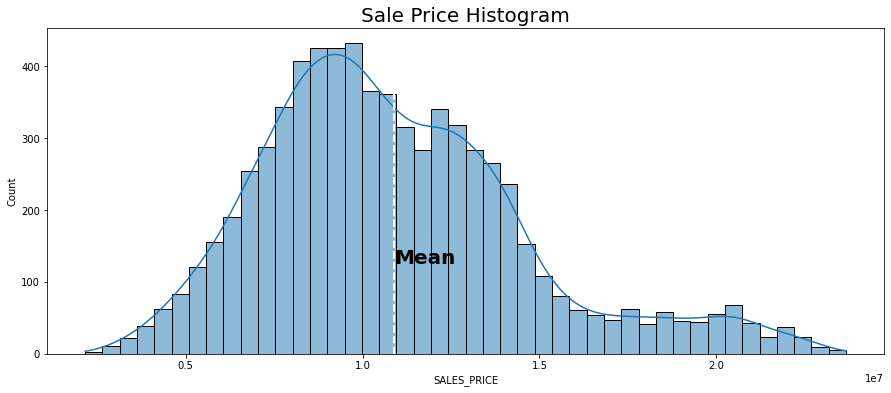

In [70]:
plt.figure(figsize = (15,6))
ax1 = plt.subplot()
sns.histplot(ch['SALES_PRICE'],kde=True)
plt.axvline(x=ch['SALES_PRICE'].mean(), color='w', linestyle='--', linewidth=2)
plt.text(ch['SALES_PRICE'].mean(), 125, "Mean", horizontalalignment='left', size=20, color='black', weight='bold')
plt.title('Sale Price Histogram',fontsize=20)

In [71]:
mean = ch['SALES_PRICE'].mean()
std = ch['SALES_PRICE'].std()
skew = ch['SALES_PRICE'].skew()
print('SalePrice : mean: {0:.3f}, std: {1:.3f}, skew: {2:.3f}'.format(mean, std, skew))

SalePrice : mean: 10888008.216, std: 3769081.298, skew: 0.776


Distribution is right skewed, therefore performing log scaling

In [72]:
ch['SALES_PRICE1'] = np.log(ch['SALES_PRICE'])
ch["REG_FEE"]=np.log(ch["REG_FEE"])
ch["COMMIS"]=np.log(ch["COMMIS"])

Viewing log transformed distribution of target variable

Text(0.5, 1.0, 'Log transformed Sale Price Histogram')

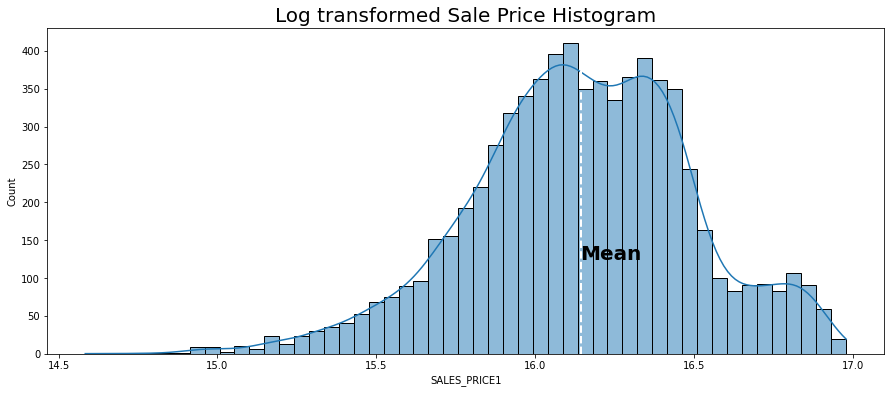

In [73]:
plt.figure(figsize = (15,6))
ax2 = plt.subplot()
sns.histplot(ch['SALES_PRICE1'],kde=True)
plt.axvline(x=ch['SALES_PRICE1'].mean(), color='w', linestyle='--', linewidth=2)
plt.text(ch['SALES_PRICE1'].mean(), 125, "Mean", horizontalalignment='left', size=20, color='black', weight='bold')
plt.title('Log transformed Sale Price Histogram',fontsize=20)

In [74]:
mean =ch['SALES_PRICE1'].mean()
std = ch['SALES_PRICE1'].std()
skew = ch['SALES_PRICE1'].skew()
print('SalePrice : mean: {0:.3f}, std: {1:.3f}, skew: {2:.3f}'.format(mean, std, skew))

SalePrice : mean: 16.143, std: 0.351, skew: -0.272


Skewness has been improved and it is not big

Dropping sales column

In [75]:
ch=ch.drop(columns=['SALES_PRICE'],axis=0)

Spearman's rank correlation for finding linear relationships between features

,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,Year_sold,Year_built,Houselife,SALES_PRICE1
INT_SQFT,1.0,0.0,0.8,0.5,1.0,0.0,-0.0,0.0,0.0,0.7,0.6,-0.1,-0.0,-0.0,0.6
DIST_MAINROAD,0.0,1.0,-0.0,0.0,0.0,0.0,-0.0,0.0,-0.0,0.0,0.0,0.0,0.0,-0.0,0.0
N_BEDROOM,0.8,-0.0,1.0,0.8,0.8,0.0,-0.0,0.0,0.0,0.5,0.4,-0.2,0.0,-0.0,0.4
N_BATHROOM,0.5,0.0,0.8,1.0,0.6,0.0,-0.0,0.0,0.0,0.3,0.2,-0.1,0.0,-0.0,0.1
N_ROOM,1.0,0.0,0.8,0.6,1.0,0.0,-0.0,0.0,0.0,0.7,0.5,-0.1,0.0,-0.0,0.6
QS_ROOMS,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.5,0.0,0.0,0.0,-0.0,0.0,0.0
QS_BATHROOM,-0.0,-0.0,-0.0,-0.0,-0.0,0.0,1.0,-0.0,0.6,-0.0,0.0,0.0,-0.0,0.0,-0.0
QS_BEDROOM,0.0,0.0,0.0,0.0,0.0,0.0,-0.0,1.0,0.6,0.0,0.0,0.0,0.0,-0.0,0.0
QS_OVERALL,0.0,-0.0,0.0,0.0,0.0,0.5,0.6,0.6,1.0,0.0,0.0,0.0,-0.0,0.0,0.0
REG_FEE,0.7,0.0,0.5,0.3,0.7,0.0,-0.0,0.0,0.0,1.0,0.6,-0.0,0.1,-0.1,0.9


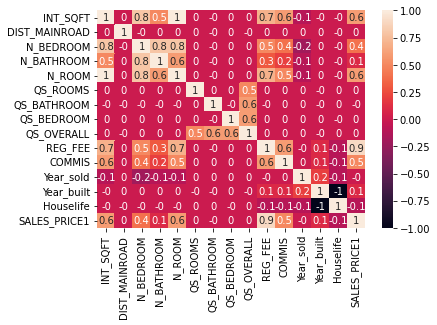

In [76]:
co=ch.corr().round(1)
sns.heatmap(data=co, annot=True)
co

Seperating numerical features

In [77]:
numerical_features = [feature for feature in ch.columns if ch[feature].dtypes != 'O']
print('Number of numerical variables: ',len(numerical_features))
numerical_features=ch[numerical_features]
numerical_features

Number of numerical variables:  15


,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,Year_sold,Year_built,Houselife,SALES_PRICE1
0,1004,131,1.0,1.0,3,4.0,3.9,4.9,4.330,12.847927,11.880343,2011,1967,44,15.843659
1,1986,26,2.0,1.0,5,4.9,4.2,2.5,3.765,13.541234,12.624944,2006,1995,11,16.893641
2,909,70,1.0,1.0,3,4.1,3.8,2.2,3.090,12.950611,11.430782,2012,1992,20,16.392632
3,1855,14,3.0,2.0,5,4.7,3.9,3.6,4.010,12.783587,11.252106,2010,1988,22,16.080424
4,1226,84,1.0,1.0,3,3.0,2.5,4.1,3.290,12.375815,11.212671,2009,1979,30,15.817835
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7104,598,51,1.0,1.0,2,3.0,2.2,2.4,2.520,12.248974,11.581145,2011,1962,49,15.493168
7105,1897,52,3.0,2.0,5,3.6,4.5,3.3,3.920,12.754746,12.233449,2004,1995,9,16.196766
7106,1614,152,2.0,1.0,4,4.3,4.2,2.9,3.840,12.667773,12.025917,2006,1978,28,15.937941
7107,787,40,1.0,1.0,2,4.6,3.8,4.1,4.160,12.960668,11.687702,2009,1977,32,15.956400


Seperating discrete features

In [78]:
## Numeical features are of two types and they are discrete and continuous.
discrete_feature=[feature for feature in numerical_features if len(ch[feature].unique())<25 ]
print("Discrete Variables Count: {}".format(len(discrete_feature)))
discrete_feature

Discrete Variables Count: 4


['N_BEDROOM', 'N_BATHROOM', 'N_ROOM', 'Year_sold']

Seperating continuous features

In [79]:
continuous_feature=[feature for feature in numerical_features if feature not in discrete_feature]
print("Continuous feature Count {}".format(len(continuous_feature)))
continuous_feature

Continuous feature Count 11


['INT_SQFT',
 'DIST_MAINROAD',
 'QS_ROOMS',
 'QS_BATHROOM',
 'QS_BEDROOM',
 'QS_OVERALL',
 'REG_FEE',
 'COMMIS',
 'Year_built',
 'Houselife',
 'SALES_PRICE1']

Comparing discrete features and salesprice

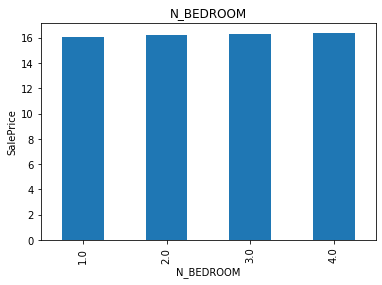

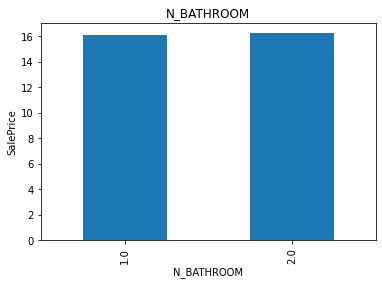

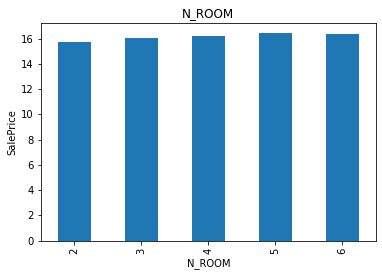

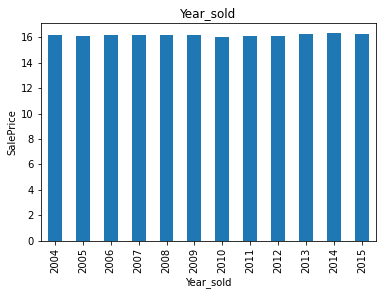

In [80]:
for feature in discrete_feature:
    ch=ch.copy()
    ch.groupby(feature)['SALES_PRICE1'].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('SalePrice')
    plt.title(feature)
    plt.show()

We observe that the features are equally distributed

plotting histograms of continuous features vs salesprice histogram
to understand the distributions

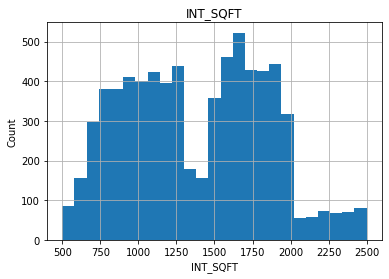

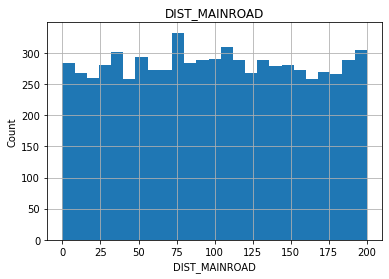

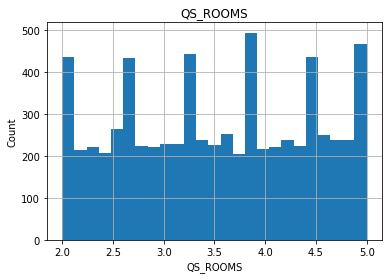

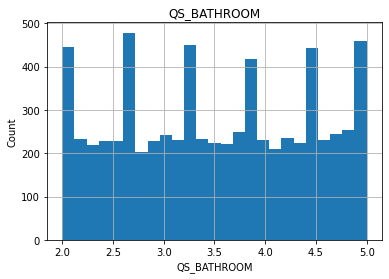

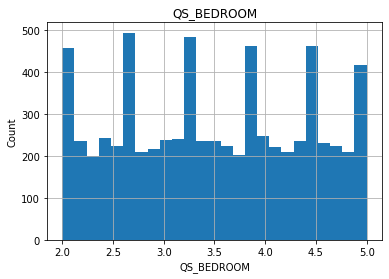

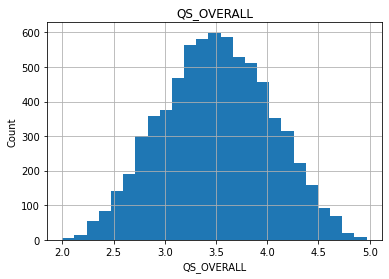

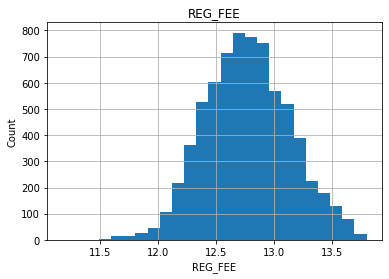

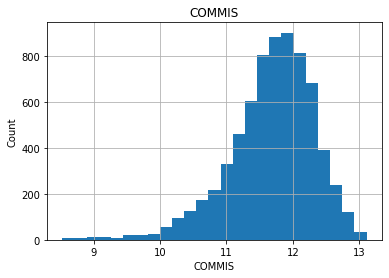

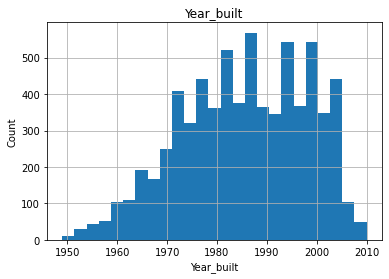

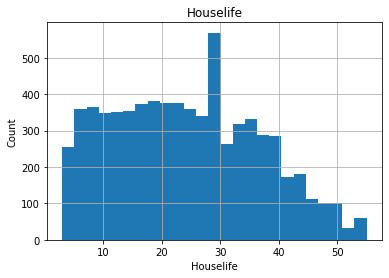

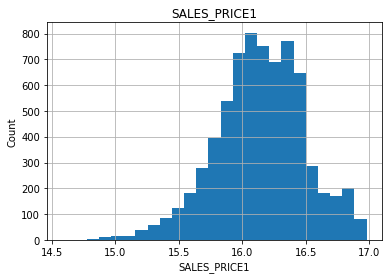

In [81]:
for feature in continuous_feature:
    data=ch.copy()
    data[feature].hist(bins=25)
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.show()

Scatter plot between continuous features and salesprice
Uses logarithmic transformation
This is done to find linear relationship

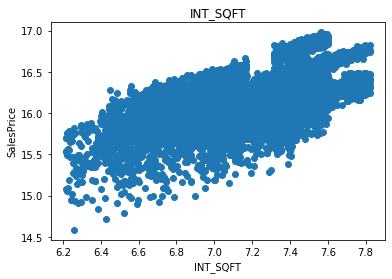

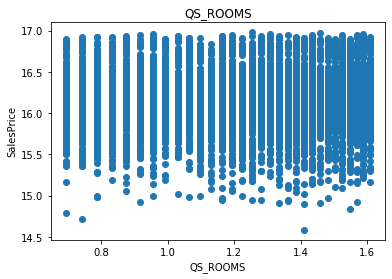

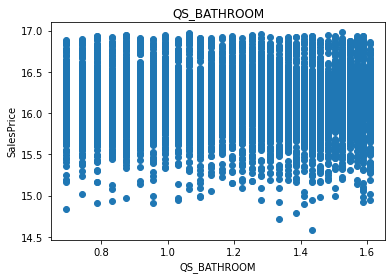

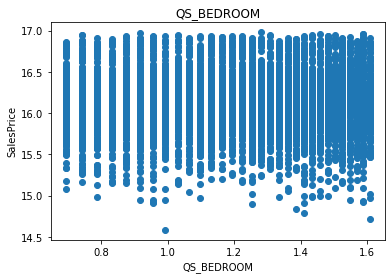

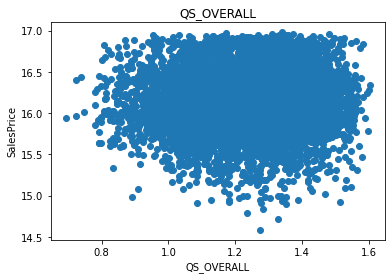

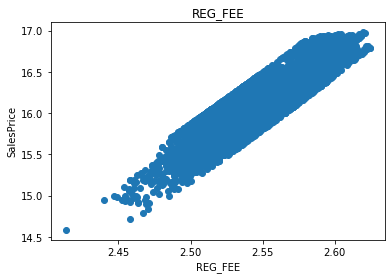

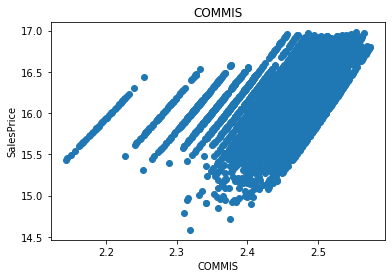

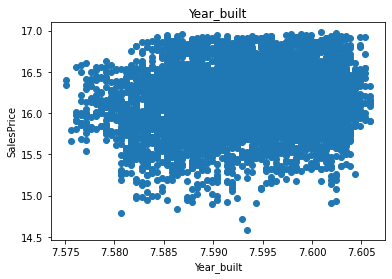

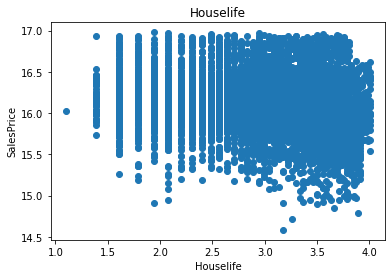

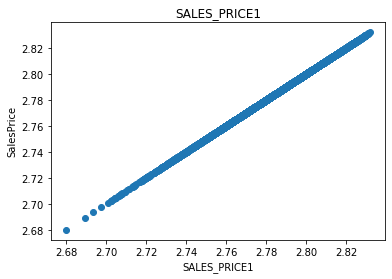

In [82]:
for feature in continuous_feature:
    data=ch.copy()
    if 0 in data[feature].unique():
        pass
    else:
        data[feature]=np.log(data[feature])
        plt.scatter(data[feature],data['SALES_PRICE1'])
        plt.xlabel(feature)
        plt.ylabel('SalesPrice')
        plt.title(feature)
        plt.show()

Checking for any relation between year_sold and salesprice

Text(0.5, 1.0, 'House Price vs YearSold')

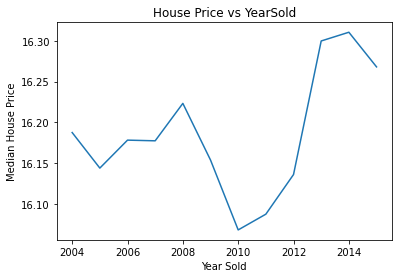

In [83]:
ch.groupby('Year_sold')['SALES_PRICE1'].median().plot()
plt.xlabel('Year Sold')
plt.ylabel('Median House Price')
plt.title("House Price vs YearSold")

Checking for realtionship between houselife and salesprice

Text(0.5, 1.0, 'House life vs salesprice')

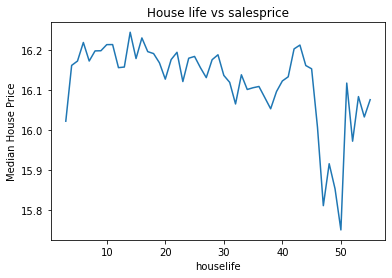

In [84]:
ch.groupby('Houselife')['SALES_PRICE1'].median().plot()
plt.xlabel('houselife')
plt.ylabel('Median House Price')
plt.title("House life vs salesprice")

Dropping Columns
Reg_fee and commis as they have no relation with target variable.
QS_room, QS_bedroom, QS_overall, N_bedroom, QS_bathroom, yearsold, dist_mainroad are also dropped as they define the room.
n_room is also dropped as we are including intsqt instead.

In [85]:
ch=ch.drop(columns=["REG_FEE","COMMIS",'QS_ROOMS','QS_BEDROOM','QS_OVERALL','N_BEDROOM','QS_BATHROOM',"Year_sold","N_ROOM","DIST_MAINROAD"])
ch.head()

,AREA,INT_SQFT,N_BATHROOM,SALE_COND,PARK_FACIL,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,Year_built,Houselife,SALES_PRICE1
0,Karapakkam,1004,1.0,AbNormal,Yes,Commercial,AllPub,Paved,A,1967,44,15.843659
1,Anna Nagar,1986,1.0,AbNormal,No,Commercial,AllPub,Gravel,RH,1995,11,16.893641
2,Adyar,909,1.0,AbNormal,Yes,Commercial,ELO,Gravel,RL,1992,20,16.392632
3,Velachery,1855,2.0,Family,No,Others,NoSeWa,Paved,I,1988,22,16.080424
4,Karapakkam,1226,1.0,AbNormal,Yes,Others,AllPub,Gravel,C,1979,30,15.817835


Categorical features

In [86]:
cat=ch[['AREA','UTILITY_AVAIL','PARK_FACIL','BUILDTYPE','STREET','SALE_COND','MZZONE']]
cat

,AREA,UTILITY_AVAIL,PARK_FACIL,BUILDTYPE,STREET,SALE_COND,MZZONE
0,Karapakkam,AllPub,Yes,Commercial,Paved,AbNormal,A
1,Anna Nagar,AllPub,No,Commercial,Gravel,AbNormal,RH
2,Adyar,ELO,Yes,Commercial,Gravel,AbNormal,RL
3,Velachery,NoSeWa,No,Others,Paved,Family,I
4,Karapakkam,AllPub,Yes,Others,Gravel,AbNormal,C
...,...,...,...,...,...,...,...
7104,Karapakkam,ELO,No,Others,No Access,AdjLand,RM
7105,Velachery,NoSeWa,Yes,Others,No Access,Family,RH
7106,Velachery,NoSeWa,No,House,Gravel,Normal Sale,I
7107,Karapakkam,ELO,Yes,Commercial,Paved,Partial,RL


Numerical features

In [87]:
num=ch[["INT_SQFT","SALES_PRICE1","Year_built","Houselife"]]
num

,INT_SQFT,SALES_PRICE1,Year_built,Houselife
0,1004,15.843659,1967,44
1,1986,16.893641,1995,11
2,909,16.392632,1992,20
3,1855,16.080424,1988,22
4,1226,15.817835,1979,30
...,...,...,...,...
7104,598,15.493168,1962,49
7105,1897,16.196766,1995,9
7106,1614,15.937941,1978,28
7107,787,15.956400,1977,32


Label encoding

In [88]:
import pandas
from sklearn import preprocessing
cat['PARK_FACIL'] = cat['PARK_FACIL'].replace(["Yes","No"],[1,0])
cat['AREA'] = cat['AREA'].replace(["Karapakkam","Adyar","Chrompet","Velachery","KK Nagar","Anna Nagar","T Nagar"],[0,1,2,3,4,5,6])
cat['BUILDTYPE'] = cat['BUILDTYPE'].replace(["House","Others","Commercial"],[0,1,2])
cat['UTILITY_AVAIL'] = cat['UTILITY_AVAIL'].replace(["ELO","NoSeWa","AllPub"],[0,1,2])
cat['STREET'] = cat['STREET'].replace(["No Access","Paved","Gravel"],[0,1,2])
cat['SALE_COND'] = cat['SALE_COND'].replace(["Partial","Family","AbNormal","Normal Sale","AdjLand"],[0,1,2,3,4])
cat['MZZONE'] = cat['MZZONE'].replace(["A","C","I","RH","RL","RM"],[0,1,2,3,4,5])
cat

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row

,AREA,UTILITY_AVAIL,PARK_FACIL,BUILDTYPE,STREET,SALE_COND,MZZONE
0,0,2,1,2,1,2,0
1,5,2,0,2,2,2,3
2,1,0,1,2,2,2,4
3,3,1,0,1,1,1,2
4,0,2,1,1,2,2,1
...,...,...,...,...,...,...,...
7104,0,0,0,1,0,4,5
7105,3,1,1,1,0,1,3
7106,3,1,0,0,2,3,2
7107,0,0,1,2,1,0,4


In [89]:
X=pd.merge(cat,num,left_index = True, right_index = True)
X

,AREA,UTILITY_AVAIL,PARK_FACIL,BUILDTYPE,STREET,SALE_COND,MZZONE,INT_SQFT,SALES_PRICE1,Year_built,Houselife
0,0,2,1,2,1,2,0,1004,15.843659,1967,44
1,5,2,0,2,2,2,3,1986,16.893641,1995,11
2,1,0,1,2,2,2,4,909,16.392632,1992,20
3,3,1,0,1,1,1,2,1855,16.080424,1988,22
4,0,2,1,1,2,2,1,1226,15.817835,1979,30
...,...,...,...,...,...,...,...,...,...,...,...
7104,0,0,0,1,0,4,5,598,15.493168,1962,49
7105,3,1,1,1,0,1,3,1897,16.196766,1995,9
7106,3,1,0,0,2,3,2,1614,15.937941,1978,28
7107,0,0,1,2,1,0,4,787,15.956400,1977,32


Y contains target variable

In [90]:
Y=X['SALES_PRICE1']
Y

0       15.843659
1       16.893641
2       16.392632
3       16.080424
4       15.817835
          ...    
7104    15.493168
7105    16.196766
7106    15.937941
7107    15.956400
7108    16.115741
Name: SALES_PRICE1, Length: 7056, dtype: float64

Dropping sales price from X such that it contains only features

In [91]:
X=X.drop(columns='SALES_PRICE1')
X

,AREA,UTILITY_AVAIL,PARK_FACIL,BUILDTYPE,STREET,SALE_COND,MZZONE,INT_SQFT,Year_built,Houselife
0,0,2,1,2,1,2,0,1004,1967,44
1,5,2,0,2,2,2,3,1986,1995,11
2,1,0,1,2,2,2,4,909,1992,20
3,3,1,0,1,1,1,2,1855,1988,22
4,0,2,1,1,2,2,1,1226,1979,30
...,...,...,...,...,...,...,...,...,...,...
7104,0,0,0,1,0,4,5,598,1962,49
7105,3,1,1,1,0,1,3,1897,1995,9
7106,3,1,0,0,2,3,2,1614,1978,28
7107,0,0,1,2,1,0,4,787,1977,32


Splitting data into training and testing

In [92]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size =0.2,random_state = 1)
print("xtrain shape : ",X_train.shape)
print("xtest shape : ",X_test.shape)
print("ytrain shape : ",Y_train.shape)
print("ytest shape : ",Y_test.shape)
XP=X_test.copy()

xtrain shape :  (5644, 10)
xtest shape :  (1412, 10)
ytrain shape :  (5644,)
ytest shape :  (1412,)


scaling using standaardization

In [93]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Xg BOOST Regression model 

Training the model for a range of learning rates to find which one gives the highest validation score

In [94]:
import xgboost as xgb
from sklearn.model_selection import cross_val_score
import numpy as np
for lr in [0.01,0.02,0.03,0.04,0.05,0.1,0.15,0.2,0.25,0.3,0.35,0.4,0.45,0.5,0.55,0.6,0.65,0.7,0.75,0.8,0.85,0.9,0.95,1]:
  model = xgb.XGBRegressor(learning_rate = lr,n_estimators=100) 
  model.fit(X_train,Y_train) 
  model.score(X_test,Y_test) 
  print("Learning rate : ", lr, " Train score : ", model.score(X_train,Y_train), " Cross-Val score : ", np.mean(cross_val_score(model,X_train,Y_train,cv=10)))

[17:10:39] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:10:39] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:10:39] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:10:39] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:10:40] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:10:40] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:10:40] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:10:40] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

For a learning rate of 0.3 we get the best validation score of 0.99457. therefore we take learning rate as 0.3 for our model

In [95]:
model1 = xgb.XGBRegressor(learning_rate = 0.3,n_estimators=100) 
model1.fit(X_train,Y_train) 
model1.score(X_test,Y_test)
print("Learning rate : ", 0.3, " Train score : ", model1.score(X_train,Y_train), " Cross-Val score : ", np.mean(cross_val_score(model1, X_train,Y_train,cv=10)))

[17:11:46] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:11:46] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:11:46] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:11:47] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:11:47] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:11:47] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:11:47] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:11:48] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

Feature importances

In [96]:
coefficients = pd.DataFrame(model1.feature_importances_,X.columns)
coefficients.columns = ['coefficients']
coefficients

,coefficients
AREA,0.291806
UTILITY_AVAIL,0.006016
PARK_FACIL,0.072930
BUILDTYPE,0.327558
STREET,0.058277
SALE_COND,0.018371
MZZONE,0.132417
INT_SQFT,0.061364
Year_built,0.015796
Houselife,0.015464


Model evaluation

In [97]:
Y_pred=model1.predict(X_test)
Y_pred
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test,Y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(Y_test,Y_pred))
print('R2- SCORE:', metrics.r2_score(Y_test,Y_pred))

Mean Absolute Error: 0.019431239950476218
Mean Squared Error: 0.0007099282154779374
R2- SCORE: 0.9941829340045603


Scatter plot between true and predicted value

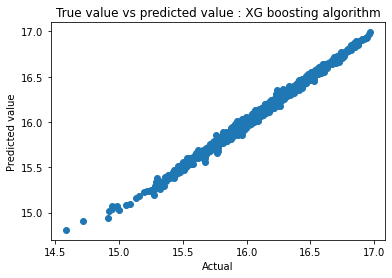

In [98]:
plt.scatter(Y_test,Y_pred)
plt.xlabel("Actual")
plt.ylabel("Predicted value")
plt.title("True value vs predicted value : XG boosting algorithm")
plt.show()

## Linear regression model

In [99]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression(fit_intercept=True)
regressor.fit(X_train,Y_train)
Y_pred1 = regressor.predict(X_test)

In [100]:
coefficients_linear = pd.DataFrame(regressor.coef_,X.columns)
coefficients_linear.columns = ['coefficients_linear']
coefficients_linear

,coefficients_linear
AREA,0.124000
UTILITY_AVAIL,0.003669
PARK_FACIL,0.052725
BUILDTYPE,0.166698
STREET,0.037602
SALE_COND,0.017777
MZZONE,0.105466
INT_SQFT,0.114241
Year_built,-0.014161
Houselife,-0.036550


In [101]:
df2 = pd.DataFrame({'Actual': Y_test,'Predicted': Y_pred1})
df2

,Actual,Predicted
2646,15.921337,15.960002
5805,15.830514,15.915591
6148,16.031328,16.056276
3857,16.306453,16.165459
2401,16.100677,15.802106
...,...,...
1304,16.859550,16.797969
4887,16.413600,16.498568
6890,15.825083,15.923608
3420,15.927790,16.018886


Scatter plot between true and predicted values

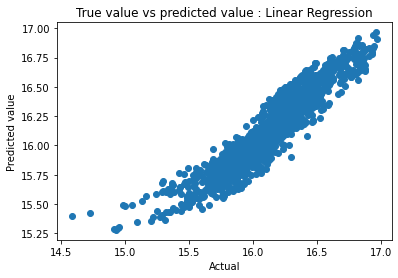

In [102]:
plt.scatter(Y_test,Y_pred1)
plt.xlabel("Actual")
plt.ylabel("Predicted value")
plt.title("True value vs predicted value : Linear Regression")
plt.show()

A good line cannot be found

Model evaluation

In [103]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, Y_pred1))
print('Mean Squared Error:', metrics.mean_squared_error(Y_test, Y_pred1))
print('R2- SCORE:', metrics.r2_score(Y_test,Y_pred1))

Mean Absolute Error: 0.0974897934958937
Mean Squared Error: 0.01551063459100437
R2- SCORE: 0.8729077347823379


## Random Forest model

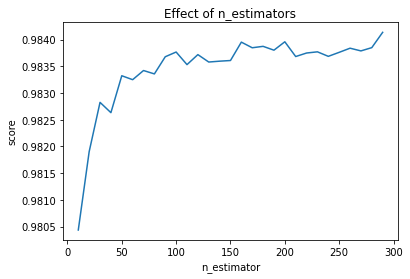

In [104]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
estimators = np.arange(10, 300, 10)
scores = []
for n in estimators:
    model.set_params(n_estimators=n)
    model.fit(X_train, Y_train)
    scores.append(model.score(X_test,Y_test))
plt.title("Effect of n_estimators")
plt.xlabel("n_estimator")
plt.ylabel("score")
plt.plot(estimators,scores)

In [105]:
model2 = RandomForestRegressor()
model2.fit(X_train,Y_train)

RandomForestRegressor()

Model evaluation

In [106]:
a=model2.predict(X_test)
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test,a))
print('Mean Squared Error:', metrics.mean_squared_error(Y_test,a))
print('R2- SCORE:', metrics.r2_score(Y_test,a))

Mean Absolute Error: 0.031798442904301776
Mean Squared Error: 0.002050067093882227
R2- SCORE: 0.9832019980045955


## KNN model

In [107]:
from sklearn.neighbors import KNeighborsRegressor
model3 = KNeighborsRegressor()
model3.fit(X_train,Y_train)
b = model3.predict(X_test)

Model evaluation

In [108]:
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test,b))
print('Mean Squared Error:', metrics.mean_squared_error(Y_test,b))
print('R2- SCORE:', metrics.r2_score(Y_test,b))

Mean Absolute Error: 0.08923502260838446
Mean Squared Error: 0.014661066613598981
R2- SCORE: 0.879868992110098
